## Michael Drake Lab One
### Creating Tidy Data
10/3/2016

In [114]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

Lacking a good data set, I sought out a freely available dataset online for this lab
I chose to use plant-ant interaction data gathered by D.W. Davidson and B.L. Fisher for their 1991 paper
'Symbiosis of ants with Cecropia as a function of light regime.
These data are made freely available on the Interaction Web Database website

This simple, though messy, data set records the number of interaction events that were observed between 6 plant species and 4 ant species
As given on the website, the original paper sought to ' discuss why it is wrong to assume that reciprical extreme specialization is a prerequiste 
for coevolution and consider how different kinds of asymmetry in specialization lead to different forms of coevolution'

In [52]:
#importing data
url = "https://www.nceas.ucsb.edu/interactionweb/data/ant_plant/excel_matrices/davidson&fisher_1991.xls"
messy = pd.read_excel(url, skiprows=1)
#imports data cuts out the uninformative first row which only contained genera names
messy.head()

,plant_gen,sp,ovaticeps,xanthochroa,balzani,luteola
0,Cecropia,membranacea,26,11,16,0
1,Cecropia,engleriana,5,1,0,0
2,Cecropia,polystachya,4,2,1,0
3,Cecropia,tessmannii,0,0,3,28
4,Cecropia,species A,0,17,0,0


In [62]:
#This removes the uninformative first column which only contained pollinator genera names
messy2 = messy.drop('plant_gen', 1)
messy2.head()

,sp,ovaticeps,xanthochroa,balzani,luteola
0,membranacea,26,11,16,0
1,engleriana,5,1,0,0
2,polystachya,4,2,1,0
3,tessmannii,0,0,3,28
4,species A,0,17,0,0


In [68]:
#Let's melt up this data!
#We're going to put all of the interaction encounters into a single column, indexed by plant and animal species
tidy = pd.melt(messy2, id_vars = ['sp'], var_name='Ant Species', value_name='# of Interactions')
tidy.sort_values(by=['sp'], inplace=True)
tidy.head()

,sp,Ant Species,# of Interactions
1,engleriana,ovaticeps,5
19,engleriana,luteola,0
13,engleriana,balzani,0
7,engleriana,xanthochroa,1
11,ficifolia,xanthochroa,12


In [86]:
#Rename column headings
tidy.columns = ['Plant Species','Ant Species','# of Interactions']
tidy

,Plant Species,Ant Species,# of Interactions
1,engleriana,ovaticeps,5
19,engleriana,luteola,0
13,engleriana,balzani,0
7,engleriana,xanthochroa,1
11,ficifolia,xanthochroa,12
17,ficifolia,balzani,12
23,ficifolia,luteola,0
5,ficifolia,ovaticeps,0
18,membranacea,luteola,0
6,membranacea,xanthochroa,11


## Let's make a ***pretty*** plot to see which plant species gets the most visitors

In [123]:
#Here we collapse our interaction data down to just the plant species
plotdat = tidy.groupby('Plant Species').sum()
plotdat

,# of Interactions
Plant Species,
engleriana,6
ficifolia,24
membranacea,53
polystachya,7
species A,17
tessmannii,31


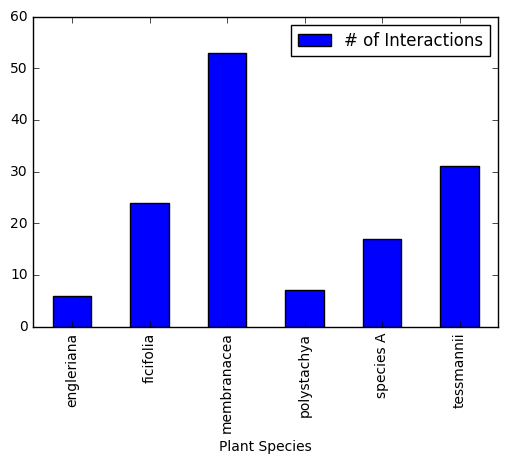

In [125]:
#Makes a nice little bar plot.  Looks like membranacea gets the most ants!
plotdat.plot.bar(y='# of Interactions')

The plot isn't as informative when we keep the data divided by plants **and** by ants

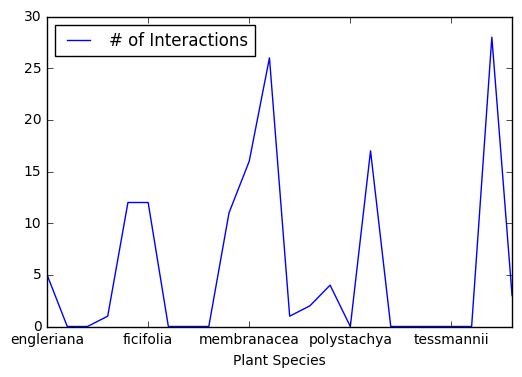

In [127]:
tidy.plot(x='Plant Species',y='# of Interactions')

To wrap things up, here is an example of an equation **$e=mc^2$**